In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import squarify
#male_directed = pd.read_csv('male_directed_clean.csv')
#female_directed = pd.read_csv('female_directed_clean.csv')
films = pd.read_csv('films_clean.csv')
genres = pd.read_csv('film_genres.csv')
genres_names = pd.read_csv('genres_names.csv')

In [162]:
film_genres = genres.merge(genres_names, on='genre_id')

In [163]:
film_genres

,film_id,genre_id,genre
0,11860,10,Comedy
1,12110,10,Comedy
2,11010,10,Comedy
3,4482,10,Comedy
4,40154,10,Comedy
...,...,...,...
20876,68954,18,TV Movie
20877,447061,18,TV Movie
20878,46203,18,TV Movie
20879,32593,18,TV Movie


In [147]:
sizes = [25, 35, 20, 10, 10]
labels = ['A', 'B', 'C', 'D', 'E']

# Create a color map, if desired
cmap = plt.cm.get_cmap('YlOrRd')

# Plotting the treemap
plt.figure(figsize=(8, 6))
squarify.plot(sizes=sizes, label=labels, color=cmap(sizes))
plt.axis('off')
plt.title("Treemap Example")

# Show the plot
plt.show()
In this example, we define the sizes list to represent the sizes of different regions in the treemap, and the labels list to represent the labels for each region. You can modify these lists to suit your own data.

The cmap variable defines the color map to be used for the treemap. You can choose a different color map or customize the colors as per your preference.

The squarify.plot() function is used to generate the treemap plot based on the provided sizes and labels. The color parameter is set to cmap(sizes) to assign colors to the different regions based on their sizes.

Finally, we turn off the axis with plt.axis('off') and add a title with plt.title().

When you run this code, it will generate a treemap plot using matplotlib and display it using plt.show().








SyntaxError: invalid syntax (2467154940.py, line 15)

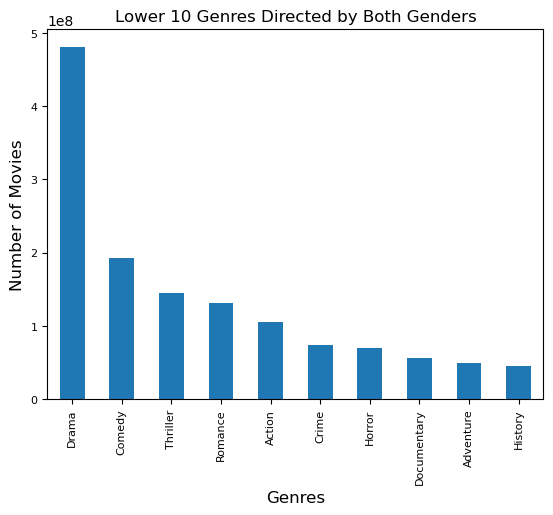

In [164]:
top10_genres_both = film_genres.groupby('genre')['film_id'].sum().sort_values(ascending=False)[:10]
plt.show()
ax = top10_genres_both.plot(kind='bar', fontsize=8)
ax.set_title('Lower 10 Genres Directed by Both Genders', fontsize=12)
ax.set_xlabel('Genres', fontsize=12)
ax.set_ylabel('Number of Movies', fontsize=12)
plt.show()

#'A film can have multiple genres.'

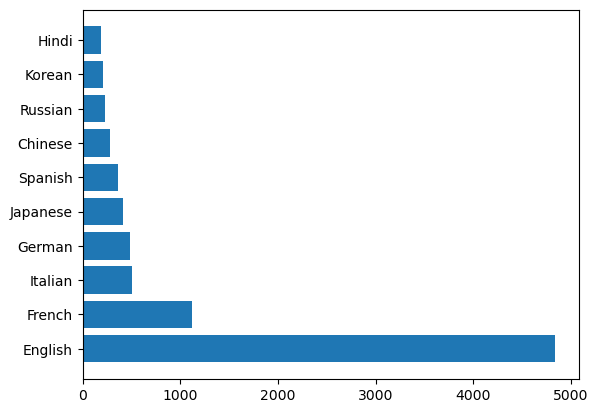

In [ ]:
top_languages = films['original_language'].value_counts(ascending=True)
plt.figure()
bars = plt.barh(languages.index, languages)
plt.show()

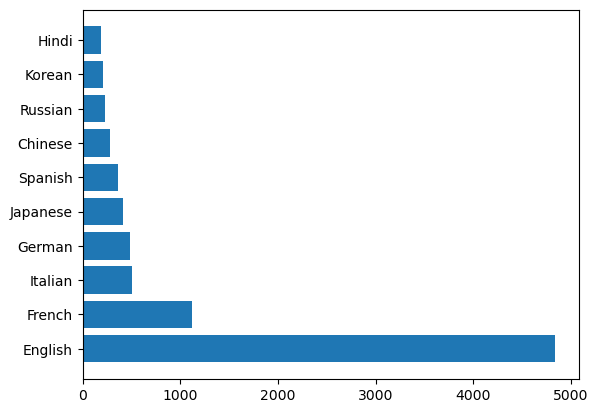

In [ ]:
lower_languages = male['original_language'].value_counts()
plt.figure()
bars = plt.barh(languages.index, languages)
plt.show()

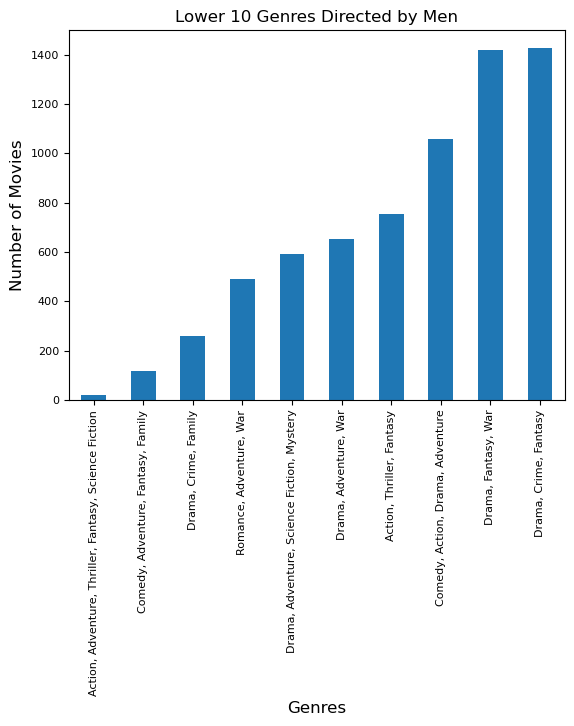

In [ ]:
lower10_genres = male_directed.groupby('genres')['id'].sum().sort_values()[:10]
plt.show()
ax = lower10_genres.plot(kind='bar', fontsize=8)
ax.set_title('Lower 10 Genres Directed by Men', fontsize=12)
ax.set_xlabel('Genres', fontsize=12)
ax.set_ylabel('Number of Movies', fontsize=12)
plt.show()

In [ ]:
male_directed.groupby('id')['popularity'].sum().sort_values(ascending=False)[:10]

id
321612    287.253654
339403    228.032744
315837     68.726676
550        63.869599
406990     60.581223
440597     59.578823
403119     52.854103
360249     50.949523
353491     50.903593
258489     45.382980
Name: popularity, dtype: float64

In [ ]:
female_directed.groupby('id')['popularity'].sum().sort_values(ascending=False)[:10]

id
340101    17.958512
1631      16.295091
429662    16.153534
29963     14.337355
75802     14.331454
393519    14.320893
1581      14.043416
128216    13.922815
289222    13.655178
205601    13.454169
Name: popularity, dtype: float64

In [ ]:
male_directed[male_directed['id'] == 258489]

,genres,id,original_language,overview,popularity,production_countries,title,vote_average,vote_count,year,director
8035,"Action, Adventure",258489,English,"Tarzan, having acclimated to life in London, i...",45.38298,"United Kingdom, United States of America, Canada",The Legend of Tarzan,5.5,2488.0,2016,David Yates


id
6          5.538671
17         5.691508
18        24.305260
19        14.487867
26         1.709996
            ...    
452068     8.413334
459802     0.589312
461955     2.569474
463800     2.129137
464111     3.214001
Name: popularity, Length: 8919, dtype: float64

In [ ]:
top10_genres = male_directed.groupby('genres')['id'].sum().sort_values(ascending=False)[:10]
ax = top10_genres.plot(kind='bar', 12)

ax.set_title('Top 10 Genres Directed by Men')
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Movies')
plt.show()

SyntaxError: positional argument follows keyword argument (348194106.py, line 2)

In [ ]:
female_directed.groupby('genres')['id'].sum().sort_values()[:10]

genres
Action, Drama, Thriller               2165
Action, Science Fiction, Family       7459
Drama, History, Horror                8316
Drama, Romance, Fantasy, Horror      10075
Comedy, Thriller, Horror, Western    10212
Crime, Thriller                      10955
Action, Drama, Foreign               11526
Comedy, Action, Drama                11614
Comedy, War                          11858
Drama, Romance, History, War         12660
Name: id, dtype: int64

In [ ]:
female_directed.groupby('genres')['id'].sum().sort_values(ascending=False)[:10]

genres
Drama                     20787121
Documentary                7602685
Drama, Romance             6967019
Comedy                     4774384
Comedy, Drama              4673327
Comedy, Drama, Romance     3602045
Drama, History             2086303
Drama, Thriller            1540769
Comedy, Romance            1341885
Drama, Documentary          994065
Name: id, dtype: int64

<AxesSubplot:>

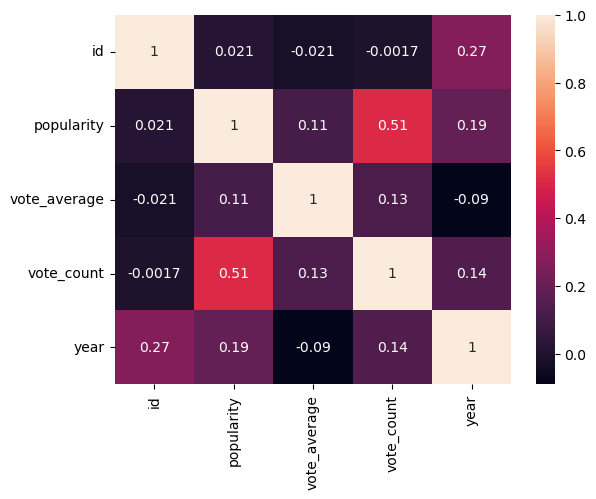

In [ ]:
sns.heatmap(m, annot=True)

In [ ]:
#Movies directed by women/men

In [ ]:
#Which genres are most popular?
#Top 10 movie genres 

In [ ]:
#Languages 

In [ ]:
#TOP TEN Directors 
male_directed.groupby

<bound method DataFrame.groupby of                                  genres      id original_language  \
0                       Comedy, Romance   11860           English   
1                        Comedy, Horror   12110           English   
2                     Action, Adventure    1408           English   
3                          Drama, Crime     524           English   
4                        Drama, Romance    4584           English   
...                                 ...     ...               ...   
8914   Drama, Thriller, Mystery, Horror  365432           English   
8915  Action, Thriller, Mystery, Horror   45527           English   
8916            Drama, Family, TV Movie   39562           English   
8917                             Comedy   14008           English   
8918             Action, Drama, Romance   30840           English   

                                               overview  popularity  \
0     An ugly duckling having undergone a remarkable...    6.6772

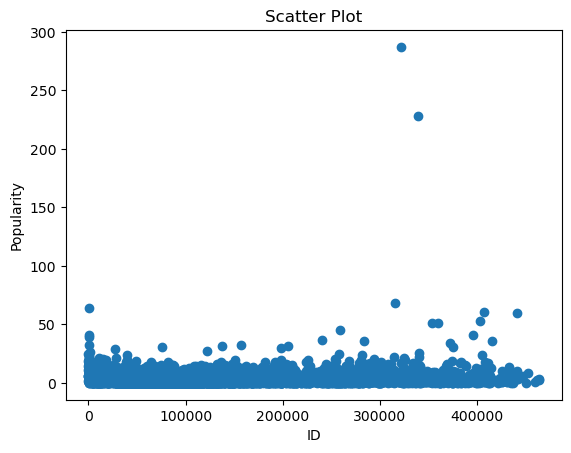

In [ ]:
#Scatterplot correlation between gender and popularity
grouped_data = male_directed.groupby('id')['popularity'].sum()
df = grouped_data.reset_index()
plt.scatter(df['id'], df['popularity'])
plt.xlabel('ID')
plt.ylabel('Popularity')
plt.title('Scatter Plot')
plt.show()

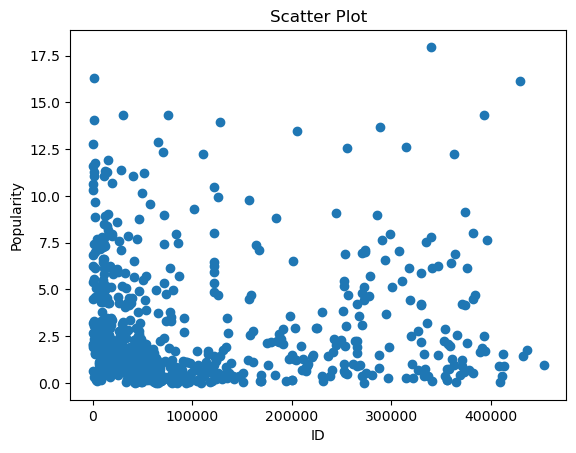

In [ ]:
grouped_data = female_directed.groupby('id')['popularity'].sum()
df = grouped_data.reset_index()
plt.scatter(df['id'], df['popularity'])
plt.xlabel('ID')
plt.ylabel('Popularity')
plt.title('Scatter Plot')
plt.show()

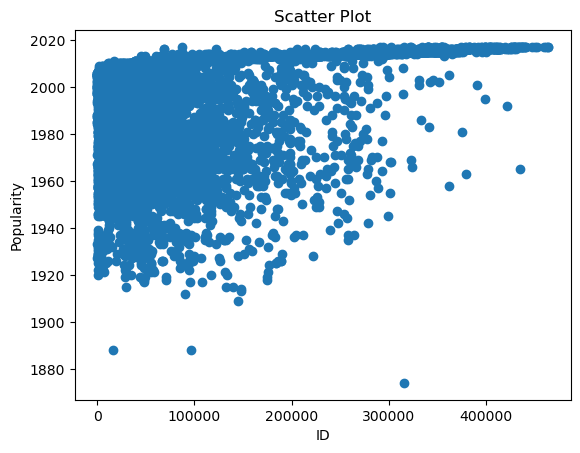

In [ ]:
grouped_data = male_directed.groupby('id')['year'].sum()
df = grouped_data.reset_index()
plt.scatter(df['id'], df['year'])
plt.xlabel('ID')
plt.ylabel('Popularity')
plt.title('Scatter Plot')
plt.show()

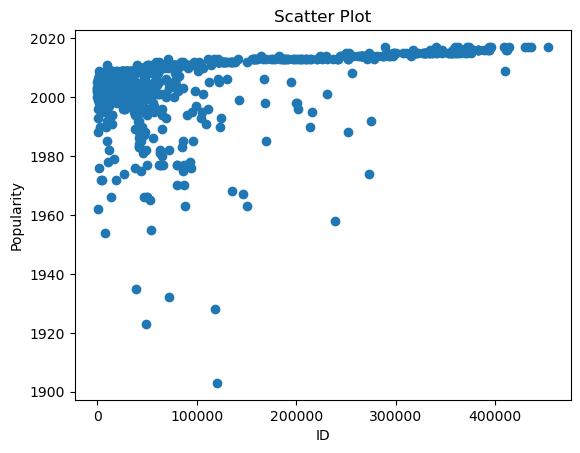

In [ ]:
grouped_data = female_directed.groupby('id')['year'].sum()
df = grouped_data.reset_index()
plt.scatter(df['id'], df['year'])
plt.xlabel('ID')
plt.ylabel('Popularity')
plt.title('Scatter Plot')
plt.show()

In [ ]:
#Popularity by genres 

In [ ]:
male_directed.groupby('id')['year'].sum()

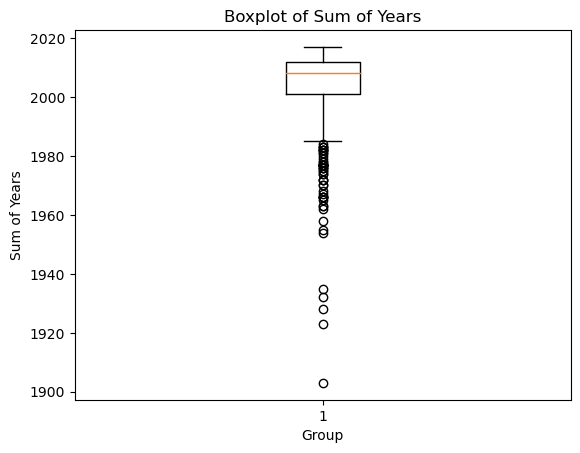

In [ ]:
grouped_data = female_directed.groupby('id')['year'].sum()

# Convert the grouped data to a list of values
values = grouped_data.values.tolist()

# Create a figure and axes
fig, ax = plt.subplots()

# Create the boxplot
ax.boxplot(values)

# Set labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Sum of Years')
ax.set_title('Boxplot of Sum of Years')

# Display the plot
plt.show()






In [ ]:
1. Scatter Plots
1. Barplot
1. Correlation plot
1. Heatmap of genres
1. Whiskersplot

SyntaxError: invalid syntax (3496273641.py, line 1)